# Traffic Sign Recognition Model
## Environment Initialisation

In [1]:
def IntialiseEnv():
    nb_dir = os.path.split(os.getcwd())[0]
    if nb_dir not in sys.path:
        sys.path.append(nb_dir)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/")
!ls
import os
os.chdir("My Drive/[ Masters ] - Deep Learning Proj/Model")
!pip install import_ipynb

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=bd686c9da0898aa8841721fa94de60b2ab1f6ea2a46cd6bbfd9200b89e0f5075
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [3]:
# Libraries
import os
import sys
import tensorflow as tf
import numpy as np
import math
IntialiseEnv()
import import_ipynb
import pickle
from sklearn.model_selection import train_test_split

# from Data_Preparation.Data_Preparation_Croatian import LoadCroatianTrainDataSet
# from Data_Preparation.Data_Preparation_Croatian import LoadCroatianTestDataSet

## Use GPU/ CPU Configuration 
Tensorflow version 2.0
Prompt to user if CPU/ GPU is in use with device name

In [4]:
# Use GPU/CPU Configurations

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.2.0
/device:GPU:0
Num GPUs Available:  1


In [5]:
def ReadTrainDataSet():
    print("Reading Train Pre-processed DataSet")
    processedTrainDataSet = '../DataSet/Processed_DataSet/CroatianTrainDataSet.pkl'
    isProcessedTrainDataSetExits= os.path.exists(processedTrainDataSet)
    train_image_array, train_image_labels = None, None
    
    if isProcessedTrainDataSetExits:
        print("Loading Processed Train DataSet from Processed_DataSet/CroatianTrainDataSet.pkl")
        file = open(processedTrainDataSet, 'rb')
        train_image_array, train_image_labels = pickle.load(file)
        file.close()
        print("Done Loading Train DataSet.")
        
    else:
        print("Processed_DataSet/CroatianTrainDataSet.pkl file does not exist")
        print("Loading Train DataSet ... This may take a while.")
        train_image_array, train_image_labels =  LoadCroatianTrainDataSet()
        file = open(processedTrainDataSet, 'wb')
        pickle.dump((train_image_array, train_image_labels), file, protocol=4)
        file.close()
        print("Saving pre-processed train DataSets in Processed_DataSet/CroatianTrainDataSet.pkl")
    return train_image_array, train_image_labels  

In [6]:
def ReadTestDataSet():
    processedTestDataSet = '../DataSet/Processed_DataSet/CroatianTestDataSet.pkl'
    isProcessedTestDataSetExits= os.path.exists(processedTestDataSet)
    test_image_array, test_image_labels = None, None
    
    if isProcessedTestDataSetExits:
        print("Loading Processed Test DataSet from Processed_DataSet/CroatianTestDataSet.pkl")
        file = open(processedTestDataSet, 'rb')
        test_image_array, test_image_labels = pickle.load(file)
        file.close()
        print("Done Loading Test DataSet.")
    else:
        print("Processed_DataSet/CroatianTestDataSet.pkl file does not exist")
        print("Loading Test DataSet ... This may take a while.")
        test_image_array, test_image_labels = LoadCroatianTestDataSet()
        file = open(processedTestDataSet, 'wb')
        pickle.dump((test_image_array, test_image_labels), file)
        file.close()
        print("Saving pre-processed test DataSets in Processed_DataSet/CroatianTestDataSet.pkl")
    return test_image_array, test_image_labels

In [7]:
train_image_array, train_image_labels= ReadTrainDataSet()

Reading Train Pre-processed DataSet
Loading Processed Train DataSet from Processed_DataSet/CroatianTrainDataSet.pkl
Done Loading Train DataSet.


In [ ]:
print(train_image_array.shape)

(4044, 60, 60, 1)


In [8]:
test_image_array, test_image_labels= ReadTestDataSet()

Loading Processed Test DataSet from Processed_DataSet/CroatianTestDataSet.pkl
Done Loading Test DataSet.


In [ ]:
print(test_image_array.shape)

(1784, 60, 60, 1)


## Train-Split 
Split Train images dataset into two splits: training and validation respectively 90-10

In [9]:
image_train, image_valid,label_train, label_valid = train_test_split(train_image_array, train_image_labels,stratify=train_image_labels,test_size=0.1,random_state=43)

In [ ]:
print(image_train.shape)

In [10]:
del train_image_array
del train_image_labels

## Hyper-parameters Tuning

In [11]:
# Hyper-parameters tuning
kernel_2 = (3,3)
pooling = (2,2)
dropout = 0.2
num_classes = 31

## Model Architecture

In [12]:
import tensorflow as tf
import keras

from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, Add,AveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv2D,BatchNormalization,Dropout,MaxPool2D,Flatten,Dense
from keras.layers import concatenate

from keras import initializers
from keras import backend as K
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


In [13]:
weight_decay=1E-4
from tensorflow.keras.regularizers import l2

def model_():
    model = None
    tf.initializers.Orthogonal(gain=1.0, seed=None)
    model=Sequential()

    model.add(Conv2D(16,kernel_2, input_shape=(60,60,1), strides = 1, padding='valid',activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Conv2D(16,kernel_2, activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(MaxPool2D(pooling))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())

    model.add(Conv2D(32,kernel_2, strides = 1, padding='valid', activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_2, activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(MaxPool2D(pooling))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())

    model.add(Conv2D(64,kernel_2, strides = 1, padding='valid', activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_2, activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(MaxPool2D(pooling))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation = tf.nn.relu,kernel_regularizer=l2(0.1)))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

In [14]:
from tensorflow import keras
model = model_()

## Model Optimizer 

In [15]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=2,  verbose=1, min_delta=1e-4, min_lr=1e-20)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(featurewise_center=False, 
                            featurewise_std_normalization=False, 
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.,)

In [17]:
x=aug.flow(image_train, np.array(label_train), batch_size=32)

## Model Training

In [18]:
history = model.fit(x, epochs=84, shuffle=True, validation_data=(image_valid, np.array(label_valid)),verbose=1,callbacks=[reduce_lr])             

Epoch 1/84
114/114 [==============================] - 11s 94ms/step - loss: 35.8800 - sparse_categorical_accuracy: 0.1454 - val_loss: 29.2110 - val_sparse_categorical_accuracy: 0.0963
Epoch 2/84
114/114 [==============================] - 3s 28ms/step - loss: 23.1187 - sparse_categorical_accuracy: 0.3163 - val_loss: 20.0648 - val_sparse_categorical_accuracy: 0.0321
Epoch 3/84
114/114 [==============================] - 3s 29ms/step - loss: 15.2117 - sparse_categorical_accuracy: 0.4191 - val_loss: 14.2247 - val_sparse_categorical_accuracy: 0.0321
Epoch 4/84
114/114 [==============================] - 3s 30ms/step - loss: 10.2167 - sparse_categorical_accuracy: 0.4889 - val_loss: 10.3742 - val_sparse_categorical_accuracy: 0.0321
Epoch 5/84
114/114 [==============================] - 3s 30ms/step - loss: 7.0076 - sparse_categorical_accuracy: 0.5551 - val_loss: 8.0418 - val_sparse_categorical_accuracy: 0.0321
Epoch 6/84
114/114 [==============================] - 3s 29ms/step - loss: 4.9513 - sp

## Model Evaluation

In [19]:
model.evaluate(test_image_array, np.array(test_image_labels), batch_size=256)

1784/1784 [==============================] - 0s 147us/step


[0.3447285624630248, 0.9882286787033081]

## Visualization

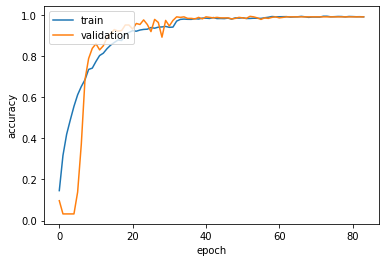

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

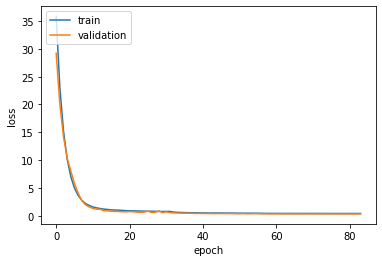

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model Summary 
Number of parameters used in the model architecture

In [ ]:
print(model.summary())

## Saving Trained .h5 Model

In [20]:
def saveCNNModel(model_name):
    model.save(model_name)

In [21]:
saveCNNModel('Trained_Models/Croatian_Winning_98_82.h5')

In [ ]:
model._set_inputs(image_train,np.array(label_train))

## Loading Saved Trained .h5 Model

In [ ]:
del model

In [ ]:
def load_model():
    Model = tf.keras.models.load_model('Trained_Models/Croatian_Winning_xx_xx.h5')
    return Model

In [ ]:
model= load_model()

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

## Computation Avg. Processing Time

In [ ]:
import time
t1=time.time()
model.predict(test_image_array)
t2=time.time()
print("Average Processing time: ", ((t2-t1)/12630)*1000, " ms")